# Assignment 3-1
## Topic: Using the Keras Functional API (2 points)

Create a neural network with identical multiple inputs as shown in the image below.
* The number of neurons in the layers or the activation function does not matter, define them yourself freely.

Tips:
* Use the `Concatenate` layer to combine the `Input2` and the third `Dense` layer into the input of the `Dense` layer shown in the left image.
* Use the `Concatenate` layer to combine the `Input3` and the third `Dense` layer as the input of the `Dense` layer shown in the right image.

* Hint: `Add` layer documentation: [https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th)

Tip! See the following diagram before starting to create an identical model with Keras:

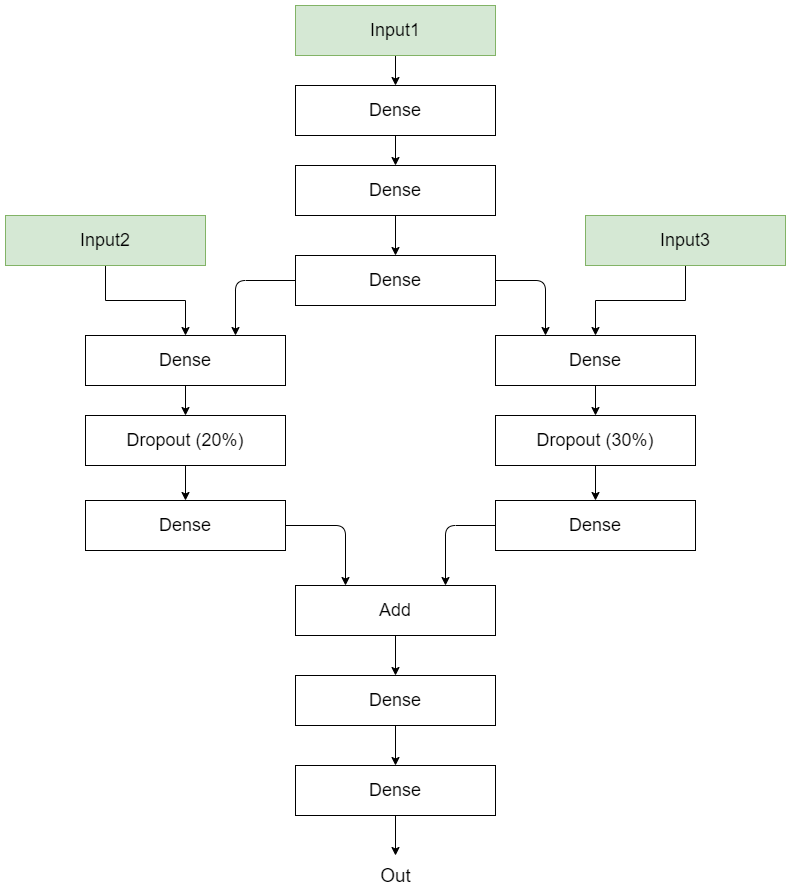

In [1]:
from IPython.display import Image
Image('../img/keras_functional_task.png')

In [2]:
# TODO: Implementation of the assignment
import tensorflow as tf

# TODO: define three input layer
input1 = tf.keras.Input(shape=(10,))
input2 = tf.keras.Input(shape=(10,))
input3 = tf.keras.Input(shape=(10,))

# TODO: Middle layer
middle_dense1 = tf.keras.layers.Dense(64, activation='relu')(input1)
middle_dense2 = tf.keras.layers.Dense(32, activation='relu')(middle_dense1)
middle_dense3 = tf.keras.layers.Dense(16, activation='relu')(middle_dense2)

# TODO: left branch
left_concat = tf.keras.layers.concatenate([input2, middle_dense3])
left_dense = tf.keras.layers.Dense(32, activation='relu')(left_concat)
left_dropout = tf.keras.layers.Dropout(0.2)(left_dense)
left_output = tf.keras.layers.Dense(16, activation='relu')(left_dropout)

# TODO: right branch
right_concat = tf.keras.layers.concatenate([input3, middle_dense3])
right_dense = tf.keras.layers.Dense(32, activation='relu')(right_concat)
right_dropout = tf.keras.layers.Dropout(0.2)(right_dense)
right_output = tf.keras.layers.Dense(16, activation='relu')(right_dropout)

# TODO: join the left and right branches to the Add layer
add_layer = tf.keras.layers.Add()([left_output, right_output])
final_dense1 = tf.keras.layers.Dense(64, activation='relu')(add_layer)
final_output = tf.keras.layers.Dense(1, activation='sigmoid')(final_dense1)

# TODO: Set the model you created in the model_functional variable.
model_functional = tf.keras.Model(inputs=[input1, input2, input3], outputs=final_output)

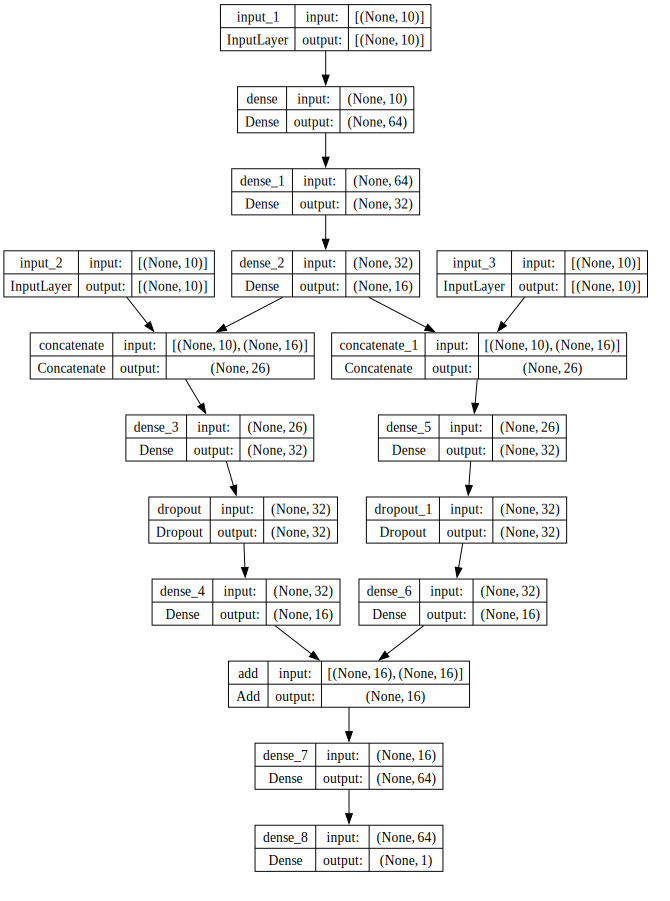

In [3]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task. Set the model you created in the model_functional variable.
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot


# TODO: Let's draw the image directly to the Notebook document with the SVG class
#  or with f.keras.utils.model_to_dot()
dot_obj = model_to_dot(model_functional, show_shapes=True, show_layer_names=True, dpi=70)
svg = dot_obj.create(prog='dot', format='svg')
display(SVG(svg))

In [4]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task. Set the model you created in the model_functional variable.
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   704       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 32)                   2080      ['dense[0][0]']               
                                                                                                  
 input_2 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                              

# Assignment 3-2
### Topic: Convolutional neural network and feature matrices (4 points)

**Background**

`Conv2D` layers transform the input image into a mathematical model that is used by tightly coupled layers to create a classification.
Since `Dense` layers can only handle 1D data, first the multidimensional feature map given by the last `Conv2D` layer must be converted to 1D format using the `Flatten` layer.

The following information is required for model configuration:

* the batch size is set to 50. These 50 samples are fed to the model at each step.
* Images are 32×32 pixel RGB images and are set to (32, 32, 3)
* Loss function is `sparse_categorical_crossentropy` and `optimizer` is `Adam()`
* There are 10 different classes in the data.
* The number of epoch cycles is only five (5) iterations. In real apps, there may be 50-100 rounds, but in training tasks, additional rounds are not more useful.
* 20% of the data is test data.
* 80% of the data is training data.

### Input data preprocessing

* Before fitting the neural network, convert the data to `float32` format, resulting in a faster training process on GPU processing.
* Data scaling ensures that the weight updates are smaller, which improves the final output and eases data processing.

### Building a deep learning model

When using this layer as the first layer in a model, you should provide the keyword argument `input_shape`.
In this example, these inputs are 28x28 RGB images with `channels_last`:

```>>> input_shape = (28, 28, 3)
>>> convLayer = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=input_shape)
```

1. In the task, two `Conv2D` layers are specified in consecutive order (3×3 kernel size + ReLU activation),
    and the numbers of filters for them are 32 and 64.
2. Next, we use the `Flatten` layer to convert the data into a 1D format.
3. There are two `Dense` layers (number of filters 64 and 10) to generate the classification.
   The last layer is not activated with ReLU, but with Softmax, resulting in a multi-class probability distribution in response to the question
   "which class is most likely?".

#### Compiling and fitting the model

After defining the deep learning architecture, we can build the model and fit the data and start test phase with test dataset.

1. Compile the model (`model.compile`)
2. Fit the data to the model (`model.fit`)
3. Evaluate model results (`model.evaluate`) using separate test data.

**Evaluating and printing:**
```
Test loss: ??? and Test accuracy: ???
```

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# TODO: Load CIFAR-10 data with cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#scale the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# TODO: Create a deep learning model.

# TODO: Create a model with Keras
model = tf.keras.models.Sequential([
        # First Conv2D layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), padding='same', strides=1),
    # Second Conv2D layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding='same', strides=1),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # First Dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Second Dense layer (output layer)
    tf.keras.layers.Dense(10, activation='softmax')
])

# TODO: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# TODO: Set the data in the model
model.fit(X_train, y_train, epochs=5, batch_size=50, validation_split=0.2)


Epoch 1/5
800/800 [==============================] - 80s 100ms/step - loss: 1.6113 - accuracy: 0.4201 - val_loss: 1.3653 - val_accuracy: 0.5180
Epoch 2/5
800/800 [==============================] - 79s 99ms/step - loss: 1.2695 - accuracy: 0.5509 - val_loss: 1.2138 - val_accuracy: 0.5719
Epoch 3/5
800/800 [==============================] - 80s 100ms/step - loss: 1.0924 - accuracy: 0.6162 - val_loss: 1.1690 - val_accuracy: 0.5889
Epoch 4/5
800/800 [==============================] - 80s 100ms/step - loss: 0.9563 - accuracy: 0.6624 - val_loss: 1.1373 - val_accuracy: 0.5980
Epoch 5/5
800/800 [==============================] - 80s 100ms/step - loss: 0.8265 - accuracy: 0.7078 - val_loss: 1.2160 - val_accuracy: 0.5901


In [6]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.

# TODO: Create a summary of the model and print evaluation metrics
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {score[0]} and accuracy: {score[1]}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                4194368   
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 4248714 (16.21 MB)
Trainable params: 4248714 (16.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Loss: 1.23456370

#### Tips

* Use 'relu' as activation function in `Conv2D` layers
* How many filters need to be defined?
* In convolution layers, the kernel size is (5,5). What the padding and stride should be, that the output has the same width and height as the input.
* In `MaxPooling2D`, pool_size is (2,2). What should be the `strides` parameter to halve the input?
* `Dropout` deactivates 20% of the neurons in the first `Dropout` layer, and it deactivates 40% in the second `Dropout` layer.

# Assignment 3-3
## Topic: Classification of News headlines using the RNN model (4 p)

Here, data is classified on the basis of whether it is a so-called _clickbait or not_.

The assignment uses the following data:
[https://github.com/bhargaviparanjape/clickbait/tree/master/dataset](https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

### Basic algorithm for the implementation of the assignment

1. Download the data from the **clickbait_data.txt** and **non_clickbait_data.txt** files
2. Let's label the titles in a category (is a clickbait == 1 or is not a clickbait == 0)
3. Split the data into training and test data (75% training data and 25% test data split)
4. Create an RNN model that predicts whether the title is a clickbait title or not
5. Predict the accuracy of the model with the `evaluate` function

## Tips:
* Use `tf.keras.preprocessing.text.Tokenizer` class for numeric conversion
* Create sequences of the same length from titles: (`num_words=number_of_words`)

### RNN and LSTM

_Recurrent neural networks_ (**RNN**) are particularly well suited for sequential data. Well-known practical applications of RNN include e.g. Google's voice search and Apple's Siri.

* RNN has internal memory.
* RNN is a deep learning algorithm that can remember the input.
* Applications of RNN are **LSTM** and **GRU**
* RNN is the recommended algorithm for sequential data, e.g., for written text, time series, weather forecasts, economic data, etc.

In an RNN, the data circulates in an internal loop. When the RNN calculates the output layer, it also considers the previous layer and also the layer before it, because it has short-term memory.

#### The assignment can be done in two different ways

When giving points, it is sufficient that you have done one of the following methods:
1. `SimpleRNN`
2. `LSTM` - the preferred method for this assignment.

In [17]:
# PROCESS DATA INTO DATAFRAME

import pandas as pd

# get paths
clickbait_path = './data/clickbait_data.txt'
non_clickbait_path = './data/non_clickbait_data.txt'

# open files, split and filter empty lines
with open(clickbait_path, 'r', encoding='utf-8') as file:
    clickbait_data_headlines = [line.strip() for line in file if line.strip()]
with open(non_clickbait_path, 'r', encoding='utf-8') as file:
    non_clickbait_data_headlines = [line.strip() for line in file if line.strip()]

# assign labels. 1 = clickbait, 0 = non_clickbait
clickbait_labels = [1] * len(clickbait_data_headlines)
non_clickbait_labels = [0] * len(non_clickbait_data_headlines)

# combine headlines and labels
headlines = clickbait_data_headlines + non_clickbait_data_headlines
labels = clickbait_labels + non_clickbait_labels

# create dataframe
df = pd.DataFrame({'Headline': headlines, 'Label': labels})

print(df)

                                                Headline  Label
0                                     Should I Get Bings      1
1          Which TV Female Friend Group Do You Belong In      1
2      The New "Star Wars: The Force Awakens" Trailer...      1
3      This Vine Of New York On "Celebrity Big Brothe...      1
4      A Couple Did A Stunning Photo Shoot With Their...      1
...                                                  ...    ...
31995  To Make Female Hearts Flutter in Iraq, Throw a...      0
31996  British Liberal Democrat Patsy Calton, 56, die...      0
31997  Drone smartphone app to help heart attack vict...      0
31998  Netanyahu Urges Pope Benedict, in Israel, to D...      0
31999  Computer Makers Prepare to Stake Bigger Claim ...      0

[32000 rows x 2 columns]


In [76]:
# Split data into training 75% and testing 25% using train test split.
import datetime # import datetime for excessive testing and training of model to shuffle training/testing data between primary epochs.
from sklearn.model_selection import train_test_split

curr_time = datetime.datetime.now()
random_state_seed = curr_time.minute

X = df['Headline']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state_seed, shuffle=True)
print('Length of X_train: ',len(X_train))
print('Length of y_train: ',len(y_train))

Length of X_train:  24000
Length of y_train:  24000


In [108]:
# PREPROCESSING

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') # apply a stopword removal to filter the most high occuring words such as 'in', 'the' etc.

number_of_words = 5000
max_len = 26 # max_len=100 test_acc 49%, max_len=21 test_acc 97%, max_len=16 test_acc 96,7%
truncate_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

def remove_stopwords(text):
    if text is not None:
        words = text.split()
        words = [word for word in words if word.lower() not in stopwords.words('english')]
        return ' '.join(words)
    else:
        return ""

# remove stopwords from X_train, X_test
#X_train_no_stopwords = [remove_stopwords(text) for text in X_train]
#X_test_no_stopwords = [remove_stopwords(text) for text in X_test]

# tokenizer
tokenizer = Tokenizer(num_words=number_of_words, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
#tokenizer.fit_on_texts(X_train_no_stopwords)

# integer sequences
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
#train_seq = tokenizer.texts_to_sequences(X_train_no_stopwords)
#test_seq = tokenizer.texts_to_sequences(X_test_no_stopwords)

# add padding
X_train_padded = pad_sequences(train_seq, maxlen=max_len, padding=padding_type, truncating=truncate_type)
X_test_padded = pad_sequences(test_seq, maxlen=max_len, padding=padding_type, truncating=truncate_type)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
# Modeling, compilation, training and evaluation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# hyperparameters
embedding_dim = 16 # this parameter was controversal and I didn't feel the need to go through the trouble to loop the optimal value.

# model
lstm_model = Sequential([
    Embedding(number_of_words, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.5), # adding dropout layer here after multiple runs for an attempt to increase performance
    LSTM(32),
    Dropout(0.2), # adding another dropout. Current highest accuracy 97%
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid') # choosing 'sigmoid' activation due to the nature of the task being binary classification.
])
# compilation
lstm_model.compile(
    loss='binary_crossentropy', # choosing 'binary-crossentropy' as loss function again due to nature of task being binary classification between two labels
    optimizer='adam',
    metrics=['accuracy']
)
# training
lstm_model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test),
    verbose=2
)
# evaluation
results = lstm_model.evaluate(X_test_padded, y_test, verbose=2)

Epoch 1/10
750/750 - 12s - loss: 0.1402 - accuracy: 0.9371 - val_loss: 0.0742 - val_accuracy: 0.9741 - 12s/epoch - 15ms/step
Epoch 2/10
750/750 - 9s - loss: 0.0476 - accuracy: 0.9838 - val_loss: 0.0953 - val_accuracy: 0.9756 - 9s/epoch - 12ms/step
Epoch 3/10
750/750 - 9s - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0965 - val_accuracy: 0.9718 - 9s/epoch - 12ms/step
Epoch 4/10
750/750 - 9s - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.1040 - val_accuracy: 0.9696 - 9s/epoch - 12ms/step
Epoch 5/10
750/750 - 9s - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.1081 - val_accuracy: 0.9706 - 9s/epoch - 12ms/step
Epoch 6/10
750/750 - 9s - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.1488 - val_accuracy: 0.9695 - 9s/epoch - 12ms/step
Epoch 7/10
750/750 - 9s - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.1474 - val_accuracy: 0.9675 - 9s/epoch - 12ms/step
Epoch 8/10
750/750 - 9s - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.1896 - val_accuracy: 0.9682 - 9s/epoch - 12ms/step
Epoch 9/10
750

In [113]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task. 

# TODO: Put the result of the model.evaluate() function in the results variable.
# TODO: set metrics=['accuracy'] to monitor in model.compile() to see how much of the neural network's predictions is correct at different stages of training.

print(f"Test Loss:{results[0]:.2f} Test Accuracy:{results[1]*100:.2f}%")

Test Loss:0.15 Test Accuracy:97.09%


max headline length:  26
min headline length:  1
median headline length:  9.0


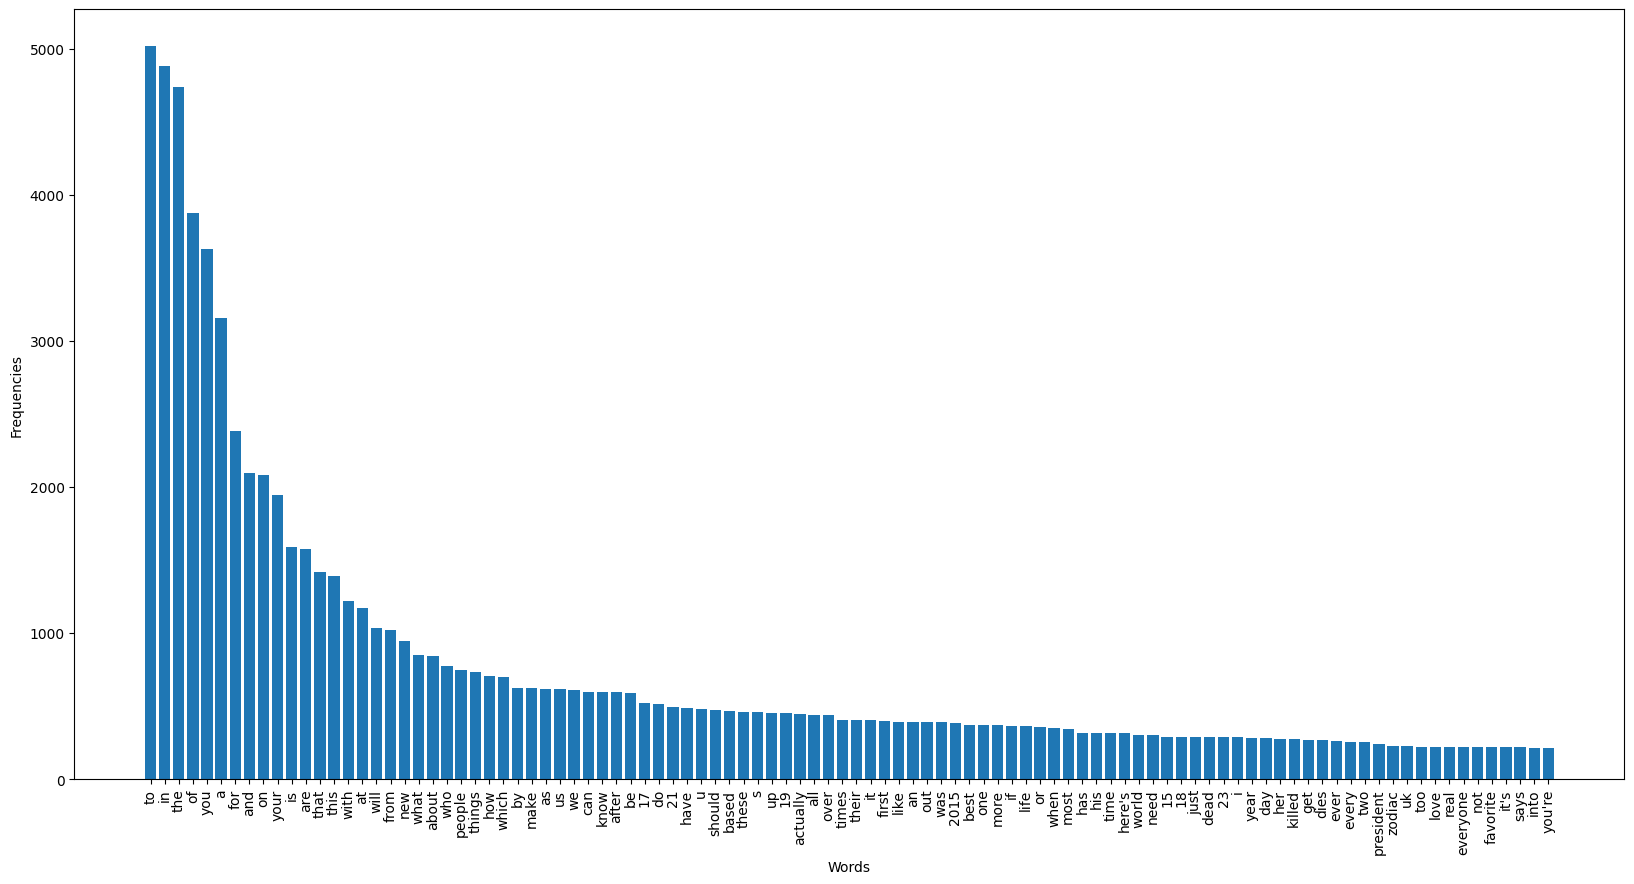

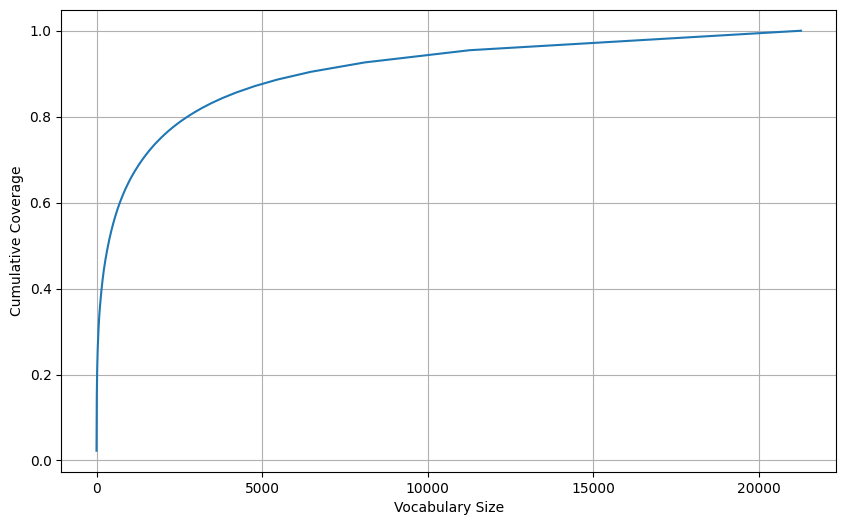

In [114]:
# calculate length of sequences to adjust max-length setting
seq_lengths = [len(seq) for seq in train_seq]
max_length = np.max(seq_lengths)
min_length = np.min(seq_lengths)
med_length = np.median(seq_lengths)
print('max headline length: ', max_length)
print('min headline length: ', min_length)
print('median headline length: ', med_length)

# calculate and analyze word frequency in data to find optimal value for vocabulary size
word_counts = tokenizer.word_counts
# plot the result
sort_word_counts = sorted(word_counts.items(),key=lambda x: x[1], reverse=True)
N = 100
words, frequencies = zip(*sort_word_counts[:N])
plt.figure(figsize=(20, 10))
plt.bar(words, frequencies)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.show()
# culumative coverage analysis
total_occ = sum(word_counts.values())
cum_cov = np.cumsum([freq for _, freq in sort_word_counts]) / total_occ
# plot CC analysis
plt.figure(figsize=(10, 6))
plt.plot(range(len(cum_cov)), cum_cov)
plt.xlabel('Vocabulary Size')
plt.ylabel('Cumulative Coverage')
plt.grid(True)
plt.show()

# ANALYSIS

As usual, I will analyze the above results here, even though it was not needed.

This analysis focuses on the assignment 3-3, RNN classification.

Aside from basic data loading, which I'm not going to address here, I split the data as requested in 75/25 train/test. In 'dl_assignments_2' I did an excessive nested loop to find the best hyperparameters for the model, but here I decided that I'm not going as deep into the rabbit hole as then, so I used datetime().minute to apply variation, but still reproductability, into the train_test_split function so that if I need to reproduce any results, I can revert to the same random_seed by the minute. That is why there is datetime used in one of the sections.

In preprocessing, I ran the model first time just with some random parameter like number_of_words = 10000 and max_len = 100, which influenced the model to a very poor performance. I then started to experiment with with different tokenizer parameters and hyperparameters by analysing the data with things like calculating the sequence of different sequences in the training data. This approach gave me the optimal 'max_len' value in each iteration. Then I analyzed different word occurences in the data to better adjust the 'number_of_words' parameter. And of course running the model between each scenario. The best accuracy I got was something like close to 98%. Then I tried the approach to remove stopwords like "the", "in" "and" etc. common words. ( I have commented those approaches out as it decreased the models performance, therefore the model is reliant on the structure and context that those common words produce). The results of these attempt are above as bar charts. The result of decreasing accuracy could also be interpreted as less overfitting result, increasing the model's performance generally, but this is again some interstellar philosophy and I choose to trust the accuracy score more than my own interpretation.

Then in modeling, I tried different combinations of hyperparameters, added dropout layers, additional LSTM layers and truthfully, additional LSTM layers didn't have much difference on the performance, but the dropout layers provided some noticeable improvement.

Overall, again a very fun and educative exercise.